In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [33]:
df = pd.read_csv('Crop and fertilizer dataset.csv').dropna()

In [34]:
df.head()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,Black,75,50,100,6.5,1000,20,Sugarcane,Urea
1,Black,80,50,100,6.5,1000,20,Sugarcane,Urea
2,Black,85,50,100,6.5,1000,20,Sugarcane,Urea
3,Black,90,50,100,6.5,1000,20,Sugarcane,Urea
4,Black,95,50,100,6.5,1000,20,Sugarcane,Urea


In [35]:
le = LabelEncoder()
df['Soil_color'] = le.fit_transform(df['Soil_color'])
df['Crop'] = le.fit_transform(df['Crop'])
df['Fertilizer'] = le.fit_transform(df['Fertilizer'])

In [36]:
print(df)

      Soil_color  Nitrogen  Phosphorus  Potassium   pH  Rainfall  Temperature  \
0              0        75          50        100  6.5      1000           20   
1              0        80          50        100  6.5      1000           20   
2              0        85          50        100  6.5      1000           20   
3              0        90          50        100  6.5      1000           20   
4              0        95          50        100  6.5      1000           20   
...          ...       ...         ...        ...  ...       ...          ...   
4508           0       130          80        150  7.0      1400           30   
4509           0       135          80        150  7.0      1400           30   
4510           0       140          80        150  7.0      1400           30   
4511           0       145          80        150  7.0      1400           30   
4512           0       150          80        150  7.0      1400           30   

      Crop  Fertilizer  
0 

In [37]:
X = df.drop('Fertilizer', axis=1)
y = df['Fertilizer']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [40]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = rf_model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 95.34883720930233


In [43]:
importances = rf_model.feature_importances_

In [44]:
indices = np.argsort(importances)[::-1]

In [45]:
names = [X.columns[i] for i in indices]

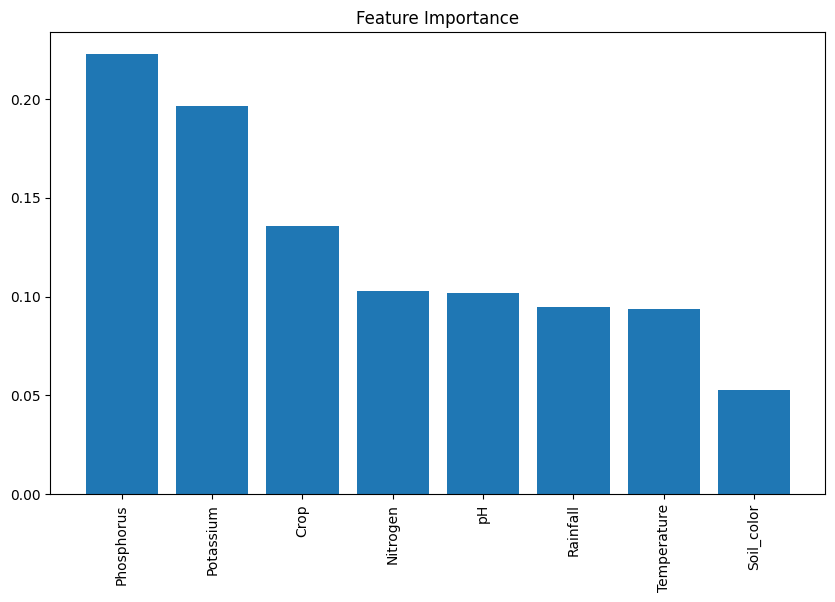

In [46]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [52]:
def encode_input(Soil_color, Nitrogen, humidity, rainfall, pH, nitrogen, phosphorus, potassium):
    soil_color_encoded = le.transform([soil_color])[0]
    input_data = [soil_color_encoded, temperature, humidity, rainfall, pH, nitrogen, phosphorus, potassium]
    return np.asarray(input_data).reshape(1, -1)

# Function to make prediction
def predict_fertilizer(input_data):
    prediction = rf_model.predict(input_data)
    original = le.inverse_transform(prediction)
    return original[0]

# Example usage
input_soil_color = "Black"
input_data = (input_soil_color, 75, 50, 100, 6.5, 1000, 20, 11)

encoded_input = encode_input(*input_data)
predicted_fertilizer = predict_fertilizer(encoded_input)
print("Predicted Fertilizer:", predicted_fertilizer)

ValueError: y contains previously unseen labels: ['10:10:10 NPK' '10:26:26 NPK' '12:32:16 NPK' '13:32:26 NPK'
 '18:46:00 NPK' '19:19:19 NPK' '20:20:20 NPK']

In [48]:
import joblib

In [49]:
joblib.dump(rf_model,"crop_ferti.joblib")

['crop_ferti.joblib']

In [50]:
for i in X:
    print(i)

Soil_color
Nitrogen
Phosphorus
Potassium
pH
Rainfall
Temperature
Crop
